In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import skimage.io as io 
from skimage import color
import math
from scipy import signal# misc
import imageio
# clusters shown

cluster = 'NGC6397'   # https://esahubble.org/images/heic0608b/
path = os.path.abspath(os.path.join(os.getcwd(), ".."))
strt  = os.path.join(path,'refdata\clusters',cluster, '*.tif')
collt = io.ImageCollection(strt) 
print('len of dir tiff files:',len(collt)) 
strf  = os.path.join(path,'refdata\clusters',cluster, '*.fits')
collf = io.ImageCollection(strf) 
print('len of dir fits files:',len(collf)) 
dirc  = os.path.join(path,'refdata\clusters',cluster)
listc = os.listdir(dirc)
print(listc)

len of dir tiff files: 1
len of dir fits files: 0
['h265s53a_I_0.1-2.4keV_cps1998.fits', 'heic0608b.tif', 'tif_infor.xlsx']


(5066, 3750, 3)


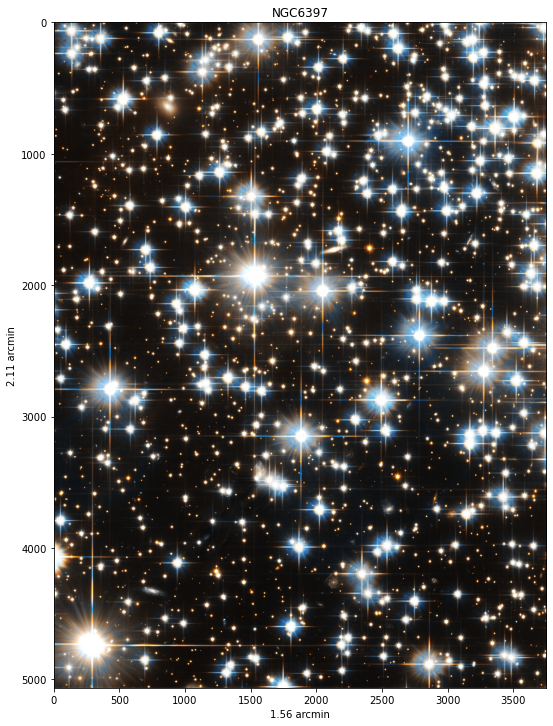

In [2]:
img = collt[0]
plt.figure(num = 'IMG0_show',figsize = [12,10]) 
plt.imshow(img)
plt.title(cluster)
#plt.axis('off')
plt.tight_layout()
plt.xlabel('1.56 arcmin')
plt.ylabel('2.11 arcmin')

print(img.shape)

Text(495.5250000000001, 0.5, '6 arcsec')

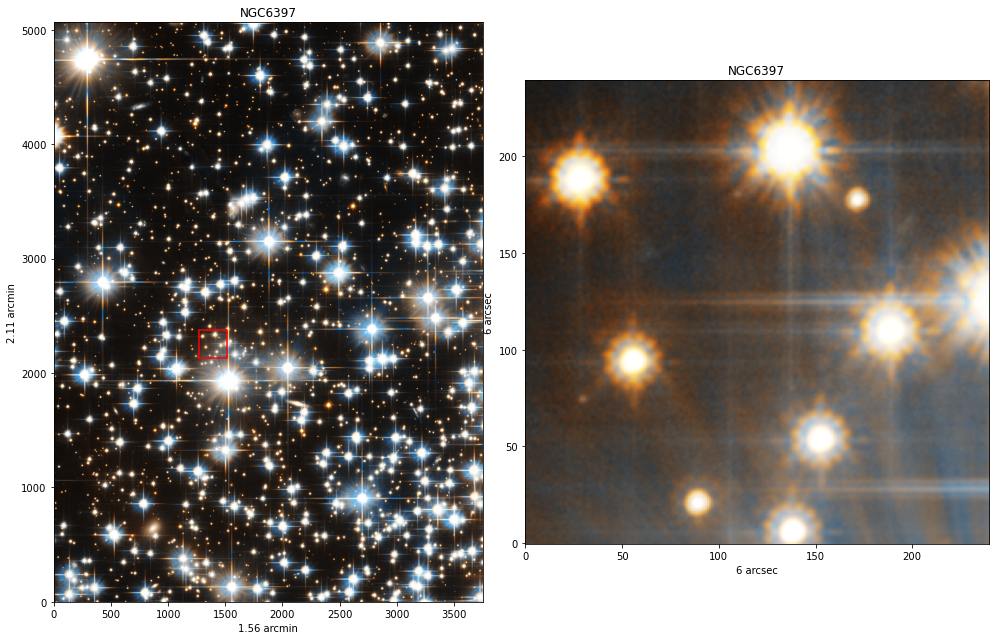

In [3]:
c1,l1 = 1272,2132
stp = 240
imgcut = img[l1:l1 + stp,c1:c1 + stp]
plt.figure(num = 'IMGcut',figsize = [14,9]) 
plt.subplot(121)
plt.imshow(img,origin = 'lower')
plt.title(cluster)
plt.tight_layout()
plt.xlabel('1.56 arcmin')
plt.ylabel('2.11 arcmin')
ax = plt.gca()
ax.add_patch(plt.Rectangle((c1,l1),stp,stp, color="red", fill=False, linewidth=1.5))
plt.subplot(122)
plt.imshow(imgcut,origin = 'lower')
plt.title(cluster)
plt.tight_layout()
plt.xlabel('6 arcsec')
plt.ylabel('6 arcsec')



Text(495.5250000000001, 0.5, '6 arcsec')

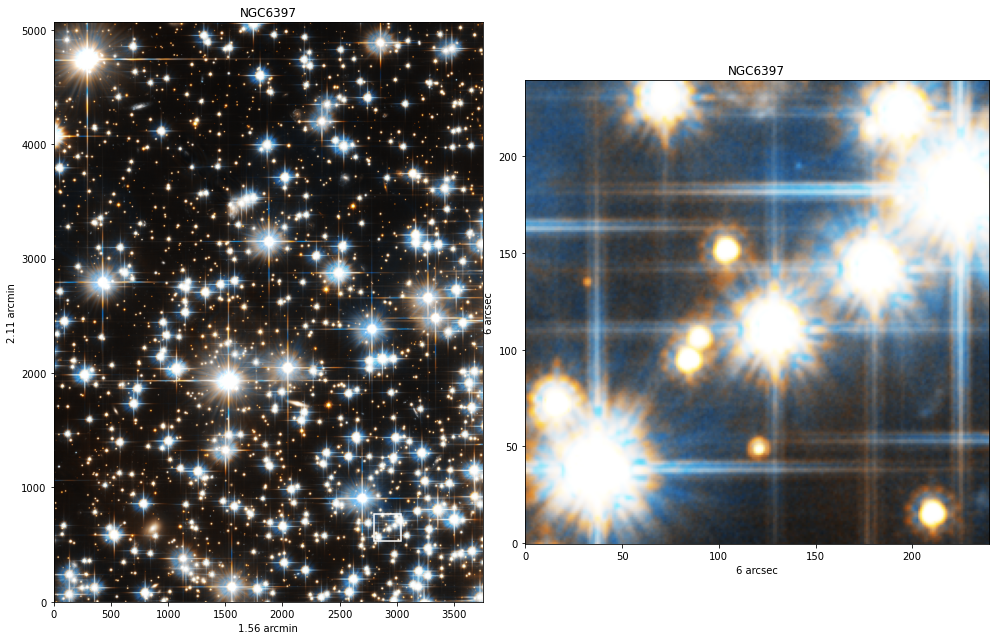

In [4]:
c1,l1 = 2800,527
imgcut = img[l1:l1 + stp,c1:c1 + stp]
plt.figure(num = 'IMGcut2',figsize = [14,9]) 
plt.subplot(121)
plt.imshow(img,origin = 'lower')
plt.title(cluster)
plt.tight_layout()
plt.xlabel('1.56 arcmin')
plt.ylabel('2.11 arcmin')
ax = plt.gca()
ax.add_patch(plt.Rectangle((c1,l1),stp,stp, color="white", fill=False, linewidth=1.5))
plt.subplot(122)
plt.imshow(imgcut,origin = 'lower')
plt.title(cluster)
plt.tight_layout()
plt.xlabel('6 arcsec')
plt.ylabel('6 arcsec')

In [8]:
################################################################
# test of the cal-star package:\ you should install the package first
# $ pip install cal-star
################################################################
from cal_star.sc_cluster import default_cluster
from cal_star.sc_cluster import cluster_infor
from cal_star.sc_cluster import show_cluster

default_cluster(cluster,filename,c1,l1,stp)

NameError: name 'filename' is not defined

len of dir tiff files: 1
len of dir fits files: 0
['h265s53a_I_0.1-2.4keV_cps1998.fits', 'heic0608b.tif', 'tif_infor.xlsx']
    Position (RA):                      17 40 58.39
0  Position (Dec):                  -53° 44' 19.90"
1   Field of view:           1.56 x 2.11 arcminutes
2     Orientation:  North is 0.4° right of vertical
(5066, 3750, 3)


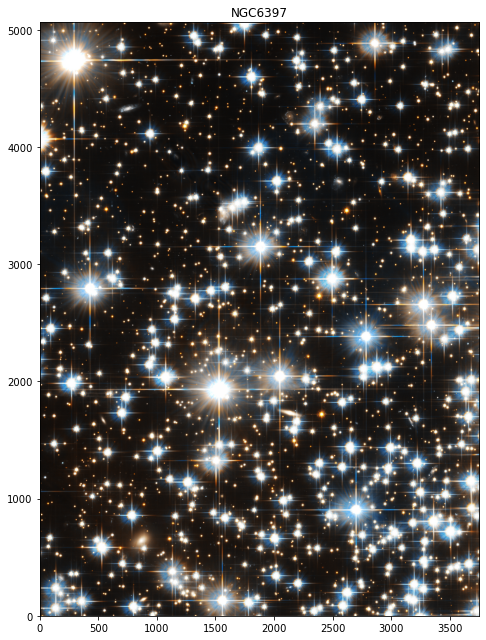

In [10]:
cluster = 'NGC6397'
filename = 'tif_infor'
cluster_infor(cluster,filename)

c1,c2,stp, represent the star line, column, and step length in pixel respectively.
len of dir tiff files: 1
len of dir fits files: 0
['h265s53a_I_0.1-2.4keV_cps1998.fits', 'heic0608b.tif', 'tif_infor.xlsx']
(5066, 3750, 3)


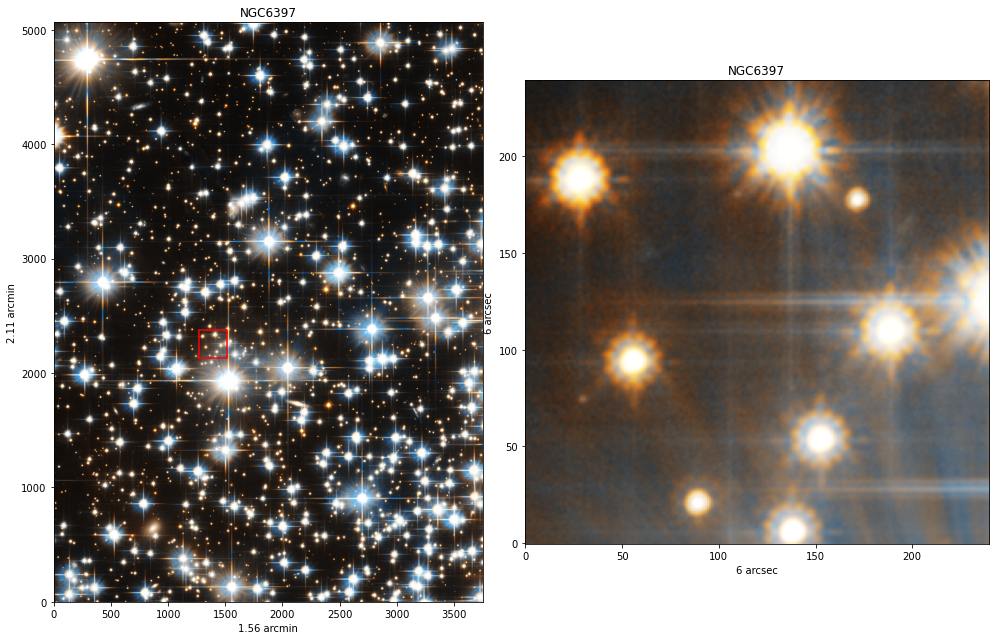

In [11]:
cluster = 'NGC6397'
filename = 'tif_infor'
c1,l1 = 1272,2132
stp = 240
img,imgcut = show_cluster(cluster,c1,l1,stp)

In [ ]:
################################################################
# test of the cal-star package:\ you should install the package first
# $ pip install cal-star
################################################################
from cal_star.sc_sp import default_sp
import matplotlib.pyplot as plt
starlist = 'Hamuy1992'
star = 'CD -34 241' 

template_wave,template_flux = star_sp(starlist,star)
plt.plot(template_wave,template_flux)

In [ ]:
from cal_star.sc_skymap import shown_listinfor
from cal_star.sc_skymap import radec2plot
starlist = 'Hamuy1992'
star = 'CD -34 241' 

# spinf: star position infromation(xi,yi)
# df： starlist information
df, spinf = shown_listinfor(starlist,star) 
print(df)

# cat： starlist information
# ram,dem, float type ra,dec information, which can be shown in the map.
cat, ram,decm = radec2plot(starlist,star)

spinf.shape
plt.figure(figsize=[12,9],num = 'position')
for i in range(19):
    plt.plot(spinf[i,0],spinf[i,1],'m.', )
    plt.legend
    plt.xtitle = ('ra')
    plt.ytitle = ('dec')
    plt.show

In [ ]:
from cal_star.sc_photometry import default_photometry
from cal_star.sc_photometry import radec2float
starlist = 'Landolt1992'
star = 'WOLF 629' 

# spinf: star position infromation(xi,yi)
# df： starlist information
df, spinf = default_photometry(starlist,star) 
print(df)

spinf.shape
plt.figure(figsize=[12,9],num = 'position')
for i in range(19):
    plt.plot(spinf[i,0],spinf[i,1],'m.', )
    plt.legend
    plt.xtitle = ('ra')
    plt.ytitle = ('dec')
    plt.show